

# Project: Investigate a Dataset - [tmdb movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>Dataset chosen for analysis: TMDB movies
>This data set includes information from The Movie Database (TMDb) about 10,000 films, including user reviews and revenue. 



### Question(s) for Analysis
>The target of this project is to find the answer for the following two answer  
	>-Which genres are most popular from year to year?
	>-What kinds of properties are associated with movies that have high revenues?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb

#  % matplotlib inline 
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling




### General Properties


# ### Data Cleaning
>**first** we get the information about the data set and the detail of its columne
>The database contains information about movies collected from The Movies Database, including revenue, budget.


In [4]:
# After discussing the structure of the data and any problems that need to be
df.info()
#   cleaned, perform those cleaning steps in the second part of this section.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

calculate the number of dublicated rows

In [5]:
sum(df.duplicated())

1

drop the duplicated row inplace

In [6]:
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

drop the unuseful column

In [7]:
df.drop([ 'id', 'imdb_id', 'budget_adj',  'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average'],axis =1,inplace = True)
df.head()

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015,1.385749e+09


In [8]:
df.shape

(10865, 12)

fill the non value cell with zero

In [9]:
df=df.fillna(0)
df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
tagline           0
runtime           0
genres            0
release_date      0
release_year      0
revenue_adj       0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> My dataset will be analyzed after it has been cleaned, with a focus on the movie genres and how they relate to other factors. 



### Research Question 1 (Which genres are most popular from year to year ?)

In [10]:
display(df.genres.value_counts())
print('-'*80)



Comedy                                            712
Drama                                             712
Documentary                                       312
Drama|Romance                                     289
Comedy|Drama                                      280
                                                 ... 
Adventure|Fantasy|Drama|Comedy|Science Fiction      1
Action|Comedy|Family|Adventure                      1
Fantasy|Animation|Comedy|Drama                      1
Horror|Action|Thriller|Crime                        1
Horror|Documentary                                  1
Name: genres, Length: 2040, dtype: int64

--------------------------------------------------------------------------------


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7924cd1c88>,
      dtype=object)

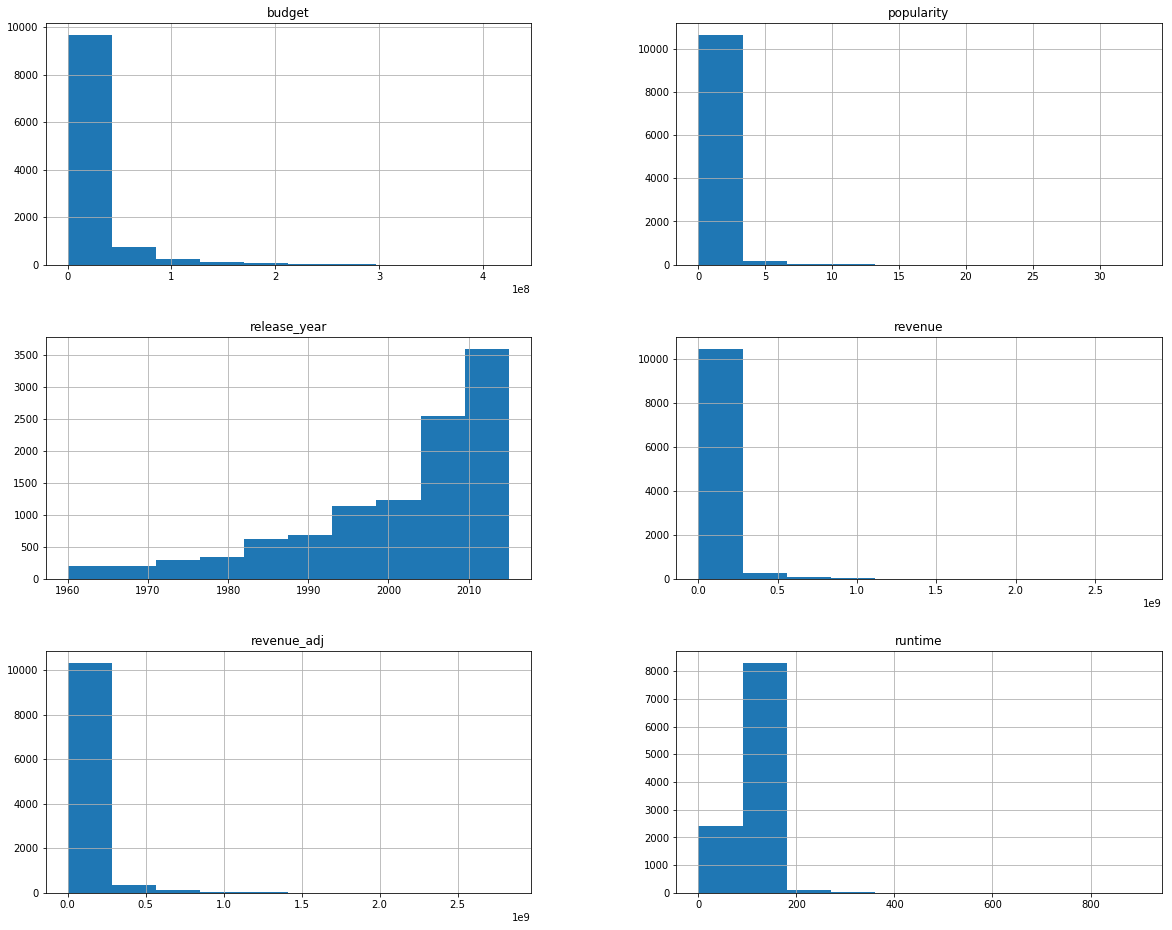

In [11]:
# Now I'm visualizing the data to get a better inderstanding of it's distributions
df.hist(figsize=(20,16))

In [12]:
# data in columns (revenue_adj,budget_adj,runtime) should not be zero
zeros = df[(df.revenue_adj == 0)]
df.drop(zeros.index,inplace=True)
df.head()

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015,1.385749e+09


In [13]:
#find the statistics of the data 
df.describe()

,popularity,budget,revenue,runtime,release_year,revenue_adj
count,4849.000000,4.849000e+03,4.849000e+03,4849.000000,4849.000000,4.849000e+03
mean,1.045202,2.956961e+07,8.923886e+07,107.968035,2000.919777,1.151009e+08
std,1.356752,4.051761e+07,1.620801e+08,21.113779,11.569650,1.988557e+08
min,0.001117,0.000000e+00,2.000000e+00,15.000000,1960.000000,2.370705e+00
25%,0.387740,1.700000e+06,7.732325e+06,95.000000,1994.000000,1.046585e+07
50%,0.680581,1.500000e+07,3.185308e+07,104.000000,2004.000000,4.395666e+07
75%,1.210502,4.000000e+07,9.996575e+07,117.000000,2010.000000,1.316482e+08
max,32.985763,4.250000e+08,2.781506e+09,705.000000,2015.000000,2.827124e+09


In [14]:

#define function to splite column 
def separate_coloumn(column):
    df[column] = df[column].str.split('|')
    nw_df=df.explode(column)
    return nw_df 



In [15]:
#call the defind function
new_df=separate_coloumn('genres')
# groupby year again and get the largest value of popularity 
new_df.groupby(['release_year','genres'])['popularity'].mean().groupby(level='release_year').nlargest(1)
# tidy up the data by removing extra row index by reset index
data = new_df.groupby(['release_year','genres'])['popularity'].mean().groupby(level='release_year').nlargest(1).reset_index(level=0, drop=True)
# change the pandas series to pandas dataframe
data = data.reset_index()
data.head()

,release_year,genres,popularity
0,1960,Horror,2.610362
1,1961,Animation,2.631987
2,1962,Thriller,3.170651
3,1963,Adventure,1.586280
4,1964,Action,3.153791


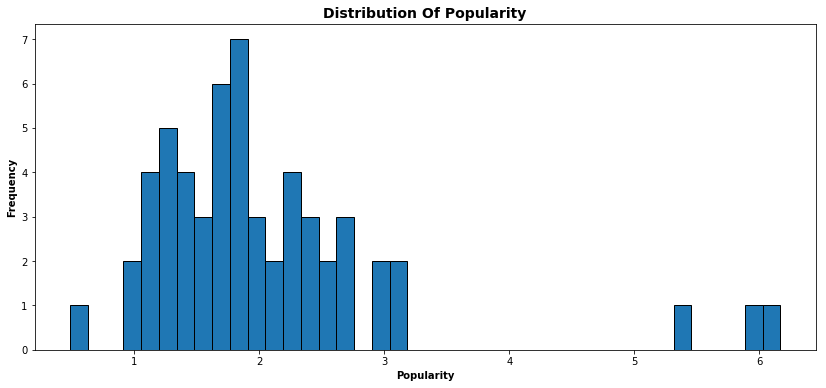

In [16]:
# plot the relation between the popularity to all moves in each year 
data["popularity"].hist(grid=False,bins=40 ,edgecolor= 'black' , figsize=[ 14 , 6] ) ; 
# Add title and format it 
plt.title( 'Distribution of popularity' .title(), fontsize = 14, weight = "bold")
# Add x label and format it 
plt.xlabel( 'popularity'.title(), fontsize = 10, weight = "bold" )
# Add y label and format it 
plt.ylabel('Frequency'.title(), fontsize=10, weight = "bold"); 

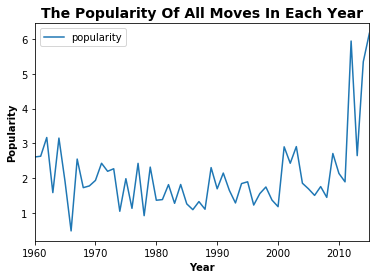

In [17]:
# plot the relation between the popularity to all moves in each year
data.plot(x="release_year", y="popularity");
plt.title( 'the popularity of all moves in each year' .title(), fontsize = 14, weight = "bold")
# Add x label and format it 
plt.xlabel( 'year'.title(), fontsize = 10, weight = "bold" )
# Add y label and format it 
plt.ylabel('popularity'.title(), fontsize=10, weight = "bold"); 

In [18]:
#explode the coulum of genres 
df=df.explode("genres")
# find the mean popularity for each genre  
genres_popularity = df.groupby(['genres'])['popularity'].mean()
print (genres_popularity)

genres
Action             1.415665
Adventure          1.716589
Animation          1.546209
Comedy             0.893541
Crime              1.029789
Documentary        0.252099
Drama              0.884220
Family             1.299258
Fantasy            1.575284
Foreign            0.200967
History            0.891439
Horror             0.772167
Music              0.746048
Mystery            1.063759
Romance            0.836023
Science Fiction    1.723532
TV Movie           0.273628
Thriller           1.144480
War                1.142443
Western            0.988272
Name: popularity, dtype: float64


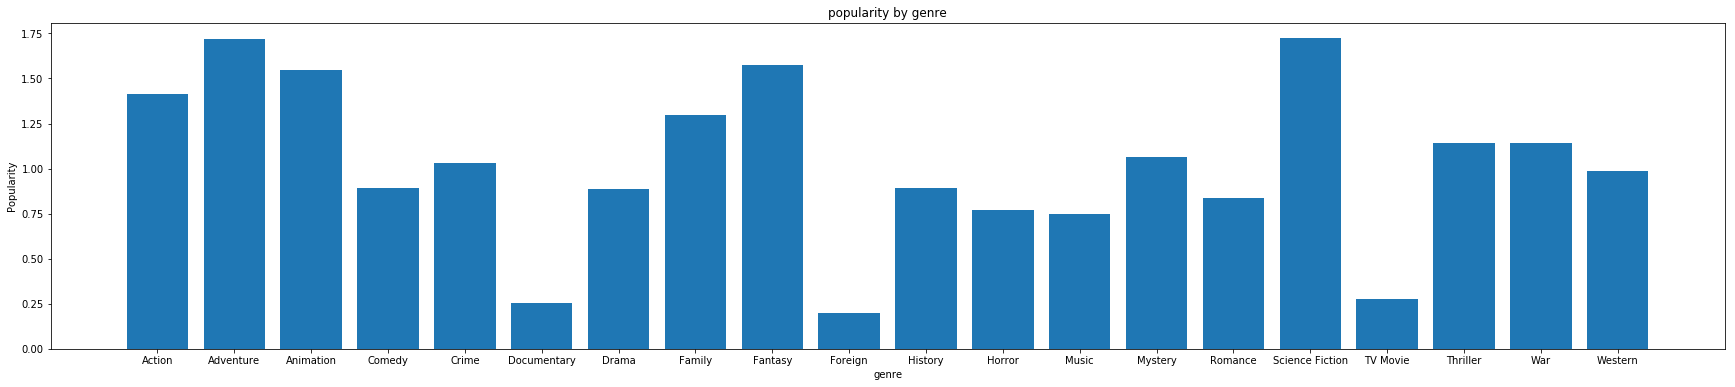

In [19]:
# plot the poularity of each genre 
plt.subplots(figsize=(30, 6))
plt.bar(genres_popularity.index, genres_popularity)
plt.title('popularity by genre')
plt.xlabel('genre')
plt.ylabel('Popularity');


Text(0.5,1,'Frequency Of Movies By Year And Genres')

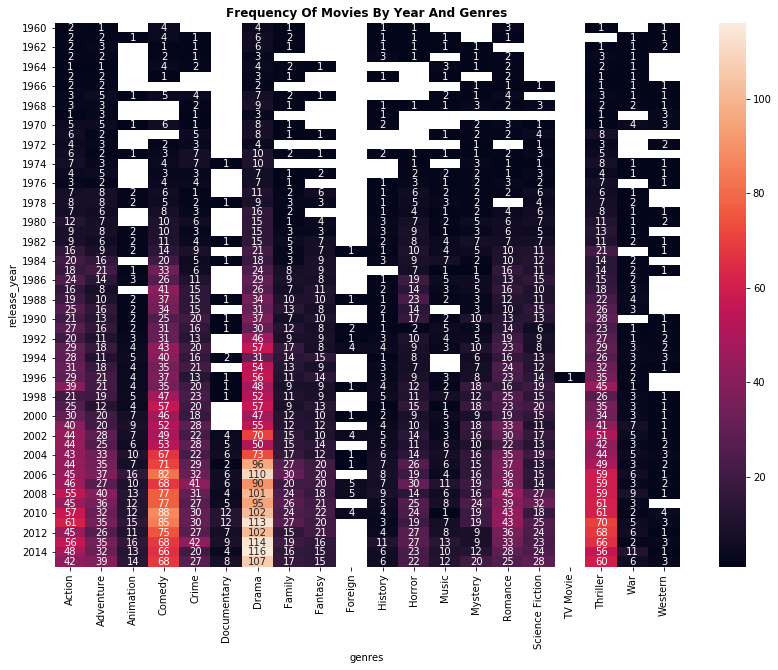

In [20]:
# plot the popularity of each genre every year 
plt.subplots(figsize=(14,10))
sb.heatmap(new_df.groupby(['release_year','genres'])['popularity'].size().unstack(),annot=True,fmt=".0f",)
plt.title('Frequency of movies by year and genres'.title(),weight='bold')

the previous heatmap show the distribution of each movie by year and geners

### Research Question 2  (What kinds of properties are associated with movies that have high revenues )

In [21]:
# we can find the highest revenue by sorting the data  according to revenue  
# the head(1) of the sorted data is the highest revenue 
df.sort_values(by='revenue',ascending=False).head(1)


,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year,revenue_adj
1386,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,162,Action,12/10/09,2009,2.827124e+09


In [22]:
#  the tail(1) of the sorted data is the lowest revenue 
df.sort_values(by='revenue',ascending=False).tail(1)


,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year,revenue_adj
8142,0.552091,6000000,2,Mallrats,Jason Lee|Jeremy London|Shannen Doherty|Claire...,Kevin Smith,They're not there to shop. They're not there t...,94,Comedy,10/20/95,1995,2.861934


<a id='conclusions'></a>
## Conclusions
> I have found that the most popular genre is the adventure in the first question 
in the second question the highest revenue movie is "Avatar" and its revenue was 2781505847	dollar .







## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0